# AN ANALYSIS OF AVIATION ACCIDENTS(1919 TO 2023)

<img src="Images/Airplane_Analysis.jpeg" style="width: 1980px; height: auto;" alt="Image description">


## **Overview**


This analysis aims at identifying the least-risk aircraft type that would encourage a well-informed purchase based on historical accidents data. This will be done by examining several variables such as accident frequency, fatality rates, aircraft type, operator and geographical distribution. This will consequently highlight the aircraft and operational environments that are associated with the highest and lowest levels of risk. Afterwards, this data will be used by the company to adjust capital investment, training programs and operational focus to improve resource allocation and minimize financial exposure in this new business endeavor. 

## **Business Problem**

The company wants to expand to the aviation industry so as to diversify its portfolio. Given that this involves purchasing and operating arplanes for commercial and private enterprises, all the risks involved have to be mitigated to a sustainable level. This ensures that the resource allocation will not only yield profits but also allows the the company to better serve its clients since it is expanding the scope of services they can offer. Using the NTSB Aviation Accidents data, I describe patterns in accidents frequency and accidents location  to anticipate the lowest-risk aircraft to invest in.


## **Data Understanding**


The [dataset](https://www.kaggle.com/datasets/drealbash/aviation-accident-from-1919-2023/data) for this analysis contains a compiled list of publicly available aviation accident reports that occurred over a period that spans well over a century: 1919 to 2023. The data set thus provides the date, location and aircraft type for each accident as well as other characteristics (e.g. registration and operator). The dataset contains a total of 23,967 records and 9 fields.

In [1]:
# Importing the necessary libraries
import pandas as pd

In [2]:
# Loading the dataset
df= pd.read_csv('Data/aviation-accident-data-2023-05-16.csv')
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


Initial exploration revealed that accidents involved in this dataset spanned multiple countries with most of them having none or very few fatalities with each accident being grouped into a specific similar category. There was also a significant number of missing values in the dataset which needed to be addressed otherwise, it would affect the analysis.

### Data Quality

The dataset involves the following 9 columns:
* **Date of Accident**: This column contains the dates of each aviation accident, ranging from 1919 to 2023. The dates are not in a standardised format while some are also missing due to the (date unk.) label

* **Type**: This column indicates the model of the aircraft that was involved in the accident. This column has no missing values.

* **Registration**: This column contains the unique identification code that is usually assigned to each aircraft. It helps identify and track specific aircraft involved in incidents. This column has 1548 missing values.

* **Operator**: This column shows the airline that commands that specific aircraft that was involved in the accident.This column has 4 missing values.

* **Fatalities**: This column records the count of fatalities associated with each aviation accident. It provides information on the number of fatalities both ground fatality and aircraft fatality. This column contains 3938 missing values. Fatalities stored as strings; requires numeric conversion.

* **Location**: This column shows the specific region within the country where each accident occurred. It could include details such as city names, airports. It contains 948 missing values.

* **Country**: This column indicates the country where each aviation accident took place. This column has no missing values.

* **Accident Category**: This column classify each aviation accident into different categories based on factors such as the cause, nature, or severity of the incident. This column has no missing values. Examples of categories: 
    * A = Accident

    * I = Incident

    * H = Hijacking

    * C = Criminal occurrence (sabotage, shoot down) O= other occurrence (ground fire, sabotage)

    * U = type of occurrence unknown

    * 1 = hull-loss

    * 2 = repairable damage

    * E.g. the A1 category means an Accident resulting in a total loss of the plane.



* **Year**: This is a column that includes the extracted year-data from the date column. It has no missing values but has them labelled as 'Unknown'.

In [3]:
# Displaying summary about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [4]:
# Displaying the columns with null values
df.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

## **Data Preparation**

Before any meaningful insights can be drawn, the dataset must be free from any significant errors or inconsistencies. As a result, the following data preparation steps were in order:


### 1. Removing Duplicates

In [5]:
# Checking the number of duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 115


In [6]:
# Removing duplicate rows
df_raw = df.drop_duplicates()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23852 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23852 non-null  object
 1   type          23852 non-null  object
 2   registration  22418 non-null  object
 3   operator      23848 non-null  object
 4   fatalities    20019 non-null  object
 5   location      22920 non-null  object
 6   country       23852 non-null  object
 7   cat           23852 non-null  object
 8   year          23852 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


### 2. Standardizing Inconsistent Formatting

In [7]:
# Standardizing column names
df_raw.columns = df_raw.columns.str.title()

In [8]:
# Removing leading and trailing spaces from the string columns
df_raw.loc[:, "Type"] = df_raw["Type"].str.strip()
df_raw.loc[:, "Registration"] = df_raw["Registration"].str.strip()
df_raw.loc[:, "Operator"] = df_raw["Operator"].str.strip()
df_raw.loc[:, "Location"] = df_raw["Location"].str.strip()
df_raw.loc[:, "Country"] = df_raw["Country"].str.strip()    
df_raw.loc[:, "Cat"] = df_raw["Cat"].str.strip()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [9]:
# Checking the current state of the dataset
df_raw.head(10)

,Date,Type,Registration,Operator,Fatalities,Location,Country,Cat,Year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


### 3. Changing the Data types 

In [10]:
# Checking the Data types available in the dataset
df_raw.dtypes

Date            object
Type            object
Registration    object
Operator        object
Fatalities      object
Location        object
Country         object
Cat             object
Year            object
dtype: object

From the information in the dataset, the data types are labelled as 'Object' which implies that most of the columns are housing multiple data types. For accurate analysis, it is necessary to have only 1 data type per column.

In [11]:
# Converting the Columns to respective data types with errors being set to Nan
df_raw.loc[:, 'Date'] = pd.to_datetime(df_raw['Date'], errors='coerce') # Date is a date value
df_raw.loc[:, 'Type'] = df_raw["Type"].astype('string') # Type is a String 
df_raw.loc[:, 'Registration'] = df_raw['Registration'].astype("string") # Registration is a String
df_raw.loc[:, 'Operator'] = df_raw['Operator'].astype("string") # Operator is a String
df_raw.loc[:, 'Fatalities'] = pd.to_numeric(df_raw['Fatalities'], errors="coerce").astype("Int64") # Fatalities is a Number
df_raw.loc[:, 'Location'] = df_raw["Location"].astype('string') # Location is a String
df_raw.loc[:, 'Country'] = df_raw["Country"].astype('string') # Country is a String
df_raw.loc[:, 'Cat'] = df_raw["Cat"].astype('string') # Cat is a String values
df_raw.loc[:, 'Year'] = pd.to_numeric(df_raw['Year'], errors="coerce").astype("Int64") # Year is a Number

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [12]:
# Checking if the data types of the columns have changed
df_raw.dtypes


Date            datetime64[ns]
Type                    string
Registration            string
Operator                string
Fatalities               Int64
Location                string
Country                 string
Cat                     string
Year                     Int64
dtype: object

### 4. Dealing With Missing Values

The following fields had missing values:

In [13]:
df_raw.isna().sum()

Date             549
Type               0
Registration    1434
Operator           4
Fatalities      4186
Location         932
Country            0
Cat                0
Year              61
dtype: int64

From the dataset, I noticed that for every missing year value, the date value was also missing. This consequently means that no detailed analysis can be made from the missing year values. Imputing them would skew the results since the range is very wide, hence decided to remove the null values in the year column.

In [14]:
# Removing null values in the Year column
df_raw = df_raw.dropna(subset=['Year'])
df_raw.isna().sum()

Date             488
Type               0
Registration    1431
Operator           4
Fatalities      4150
Location         904
Country            0
Cat                0
Year               0
dtype: int64

I also recognized that even though the 'country' column had no missing values, some of the countries were actually non-existent since some were labelled 'Unknown' while others labelled with '?'. To counter this inconsistency, I decided to change the two to be one consolidated value: 'Unspecified'. Deleting this rows with this values would significantly affect the analysis and reduce the dataset

In [15]:
# Viewing all the countries in the dataset without truncating the output
# # with pd.option_context("display.max_rows", None, 
#                        "display.max_columns", None):
#     print(pd.DataFrame(df_raw["Country"].unique(), columns=["Unique Countries"]))

# Replacing the 2 unique countries (Unknown and ?) with Unspecified
df_raw["Country"] = df_raw["Country"].replace({"Unknown country": "Unspecified", "?": "Unspecified"})

As for the Location, I also decided to include it in the analysis with the null values also being recorded as 'Unspecified'

In [16]:
# Viewing the location with missing values without truncating
# with pd.option_context("display.max_rows", None, "display.max_columns", None):
  # display(df_raw[df_raw["Location"].isna()])

# Filling the missing values in the Location column with 'Unspecified'
df_raw["Location"] = df_raw["Location"].fillna('Unspecified')
df_raw

,Date,Type,Registration,Operator,Fatalities,Location,Country,Cat,Year
61,1919-08-02,Caproni Ca.48,<NA>,Caproni,14,Verona,Italy,A1,1919
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


As for the operator, there is no logical manner to impute an operator name. This means that the most logical solution would be to assign the null operator values as 'Unknown' to avoid skewing any of the results during the analysis as a result of an odd operator name that has been imputed

In [17]:
# Replacing the null values in the Operator column with 'Unknown'
df_raw["Operator"] = df_raw["Operator"].fillna('Unknown')

The registration column is a unique key which represents each aircraft. Imputing would be difficult because any misjudged error could refer to another aircraft which would lead to misguided insights. As a result, it decided to categorise all null values in the Registration column as 'Undisclosed'

In [18]:
# Replacing the null values in the Registration column with 'Undisclosed'
df_raw["Registration"] = df_raw["Registration"].fillna('Undisclosed')

In [19]:
# Checking the remaining null values
df_raw.isna().sum()

Date             488
Type               0
Registration       0
Operator           0
Fatalities      4150
Location           0
Country            0
Cat                0
Year               0
dtype: int64

As for the remaining date values, all the null values have a corresponding year value so deleting them would reduce our accuracy. They are null because only the month and day are missing but the year is included. For accuracy, I will replace those dates with N/A since the rest of the rows contain important information

In [20]:
# Show the dates where the date is null
# with pd.option_context("display.max_rows", None, "display.max_columns", None):
   #display(df_raw[df_raw["Date"].isna()])

# Replacing the null values in the Date column with 'N/A'
df_raw["Date"] = df_raw["Date"].fillna('N/A')
df_raw

,Date,Type,Registration,Operator,Fatalities,Location,Country,Cat,Year
61,1919-08-02 00:00:00,Caproni Ca.48,Undisclosed,Caproni,14,Verona,Italy,A1,1919
62,1919-08-11 00:00:00,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23 00:00:00,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25 00:00:00,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30 00:00:00,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11 00:00:00,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,2023-05-11 00:00:00,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,2023-05-12 00:00:00,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,2023-05-14 00:00:00,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [21]:
# Checking the remaining null values
df_raw.isna().sum()

Date               0
Type               0
Registration       0
Operator           0
Fatalities      4150
Location           0
Country            0
Cat                0
Year               0
dtype: int64

As for the fatalities, I have decided to replace the missing values with the mode instead of the mean. This is because if I decided to use the mean, presence of any outliers that can be due to fatal accidents would affect the value of my analysis. As a result. I replace the missing values with the mode of the fatalities column.

In [22]:
# Replacing the null values in the fatalities column with the mode
mode_fatalities = df_raw['Fatalities'].mode()[0]
df_raw['Fatalities'] = df_raw['Fatalities'].fillna(mode_fatalities)
df_raw.isna().sum()


Date            0
Type            0
Registration    0
Operator        0
Fatalities      0
Location        0
Country         0
Cat             0
Year            0
dtype: int64

In [23]:
# The dataset is now clean and ready for analysis
df_raw.head(20)

,Date,Type,Registration,Operator,Fatalities,Location,Country,Cat,Year
61,1919-08-02 00:00:00,Caproni Ca.48,Undisclosed,Caproni,14,Verona,Italy,A1,1919
62,1919-08-11 00:00:00,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23 00:00:00,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25 00:00:00,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30 00:00:00,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,1920-12-14 00:00:00,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
67,1921-01-15 00:00:00,Aeromarine 75,Undisclosed,Aeromarine Airways,0,Havana harbour,Cuba,O1,1921
68,1921-03-02 00:00:00,Handley Page O/7,G-IAAC,HP Indo-Burmese Transport,0,Meerut,India,O1,1921
69,1921-03-04 00:00:00,Caproni Ca.60 Noviplano,Undisclosed,Caproni,0,Lago Maggiore,Italy,A1,1921
70,1921-08-26 00:00:00,Farman F.60 Goliath,O-BLAN,SNETA,2,near Calais [The Engl...,France,A1,1921


In [24]:
# Saving the cleaned dataset as a new CSV file
df_clean = df_raw.to_csv('Data/aviation-accident-data-cleaned.csv', index=False)

## **Data Analysis**

In [25]:
# Importing the necessary libraries for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

By analyzing the cleaned accident data, this will allow me to provide accurate and valuable insights from underlying trends and patterns. 

In [26]:
# Identifying the descriptive statistics of the numerical columns
df_clean = pd.read_csv('Data/aviation-accident-data-cleaned.csv')
df_clean.describe()

,Fatalities,Year
count,23791.000000,23791.000000
mean,5.074146,1973.972048
std,17.151217,25.352027
min,0.000000,1919.000000
25%,0.000000,1948.000000
50%,0.000000,1972.000000
75%,3.000000,1995.000000
max,520.000000,2023.000000


Over the more than 100-years period, there were 23791 fatalities. This means that on average there were about 5 fatalities involved in each accident. The highest fatality accident involved 520 lives which is a very high number. Given the number of flights taken worldwide per day, the ratio is low but it still warrants a thorough analysis on the happennings

### **Trends over time**

* **Accidents over time**

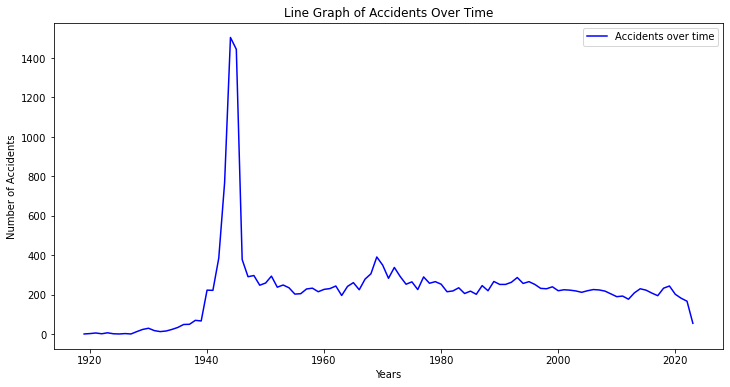

In [27]:
accidents_per_year = df_clean['Year'].value_counts().sort_index()
x_accidents = accidents_per_year.index  # sorted years
y_accidents = accidents_per_year.values  # counts

plt.figure(figsize=(12, 6)) # Setting the figure size

# A line graph showing the number of accidents over the years
plt.plot(x_accidents, y_accidents, label="Accidents over time", color="blue")

# Adding labels and title
plt.xlabel("Years")
plt.ylabel("Number of Accidents")
plt.title("Line Graph of Accidents Over Time")
plt.legend()

# Display the graph
plt.show()

The number of aircraft accidents has relatively been decreasing over the entire time period. However, there is a notable spike during the 1940s to 1950s which can effectively be attributed to the world war II where most aircrafts at that time were involved in the war. The decrease in accidents can also be attributed to development of better technologies over time hence aircraft are less prone to accidents. 

* **Fatalities over time**

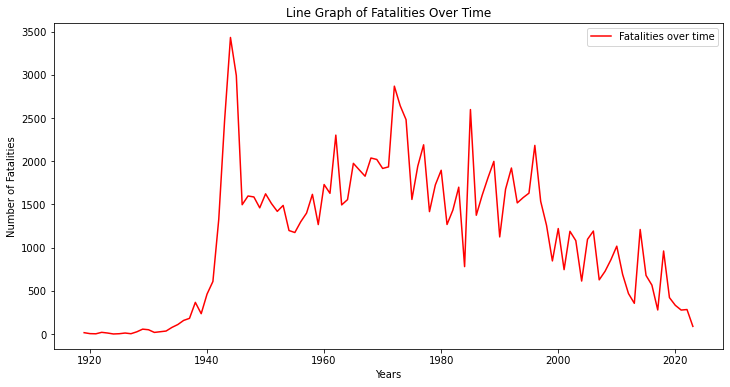

In [28]:
# Group by year and sum the fatalities
fatalities_per_year = df_clean.groupby("Year")["Fatalities"].sum()

# Defining the x and y values
x_fatal = fatalities_per_year.index
y_fatal = fatalities_per_year.values

plt.figure(figsize=(12, 6)) # Setting the figure size

# Plot line graph
plt.plot(x_fatal, y_fatal, label="Fatalities over time", color="red")

# Add labels and title
plt.xlabel("Years")
plt.ylabel("Number of Fatalities")
plt.title("Line Graph of Fatalities Over Time")
plt.legend()

# Display the graph
plt.show()

The number of fatalities has also been reducing over time. The spike between 1940 and 1950 can be attributed to the world war whereby there were a lot of casualties. Overally, there is a downward trend due to less accidents that have been happenning hence less fatalities. Newer technologies and safety standards have undoubtedly led to this decreasing trend.

* **Severity of Each accident**

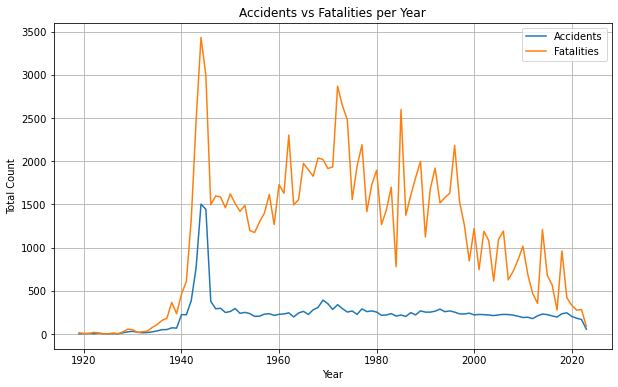

In [29]:
plt.figure(figsize=(10,6)) # Setting the figure size

plt.plot(x_accidents, y_accidents, label="Accidents")
plt.plot(x_fatal, y_fatal, label="Fatalities")

plt.title("Accidents vs Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.legend()
plt.grid(True)
plt.show()



The more the number of accidents, the higher the number of fatalities. Also worth noting is that a single accident leads to a lot of fatalities hence meaning that the accidents are mostly commercial because they have more carrying capacity. Thus, for the company to consider investing in an aircraft, it is worth noting that as much as the accidents occurrence is low for commercial planes, the fatalities are high which might be costly in the event due to circumstances like insurance payoff. This however, doesn't rule out investing in commercial planes.

### **Aircraft Risk Profiling**


* **Top aircraft models by least accidents count**

In [30]:
# Top aircraft models by accident count
top_aircraft_models = df_clean['Type'].value_counts()
top_aircraft_models_df = top_aircraft_models.reset_index()
top_aircraft_models_df.columns = ['Aircraft Model', 'Accident Count']
top_aircraft_models_df = top_aircraft_models_df.sort_values(by="Accident Count", ascending=True)
top_aircraft_models_df


,Aircraft Model,Accident Count
3196,Boeing 747-209F,1
2216,Junkers Ju-52/3m g4e (MS),1
2217,Boeing 747-271C (SCD),1
2218,Bombardier CRJ-900LR (CL-600-2D24),1
2219,DC-8-60,1
...,...,...
4,Antonov An-2R,389
3,Curtiss C-46A,564
2,Douglas C-47B (DC-3),592
1,Douglas C-47 (DC-3),668


The above are the best aircrafts to invest in based on the number of accidents that they are prone to. The list is large and involves only aircrafts type that have been involved in accidents over the 100-year period but does not consider those that are not involved. This shows that venturing into this industry can be worthwhile especially during the last decade very few accidents are occurring. And for those that are occurring, it could be necessarily attributed to other external factors such as operators, weather conditions, location e.t.c and not on the aircraft model.

Text(0, 0.5, 'Number of Accidents')

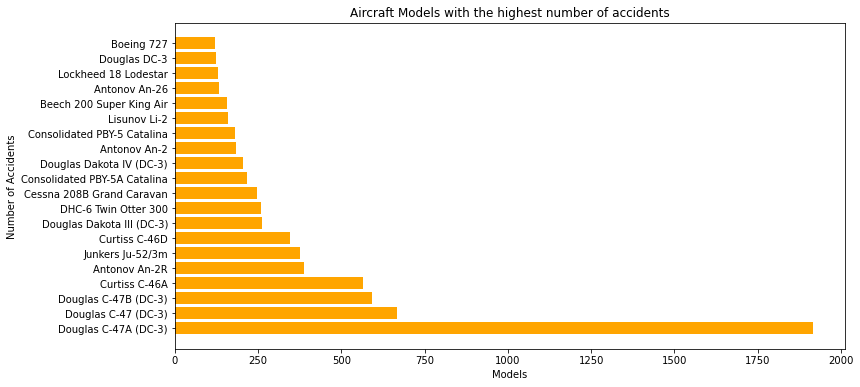

In [31]:
# Getting the top 20 aircraft models with the highest accident counts
top_20 = top_aircraft_models.head(20)

# Bar chart for top 20 aircraft models by accident count

plt.figure(figsize=(12,6)) # Setting the figure size
plt.barh(top_20.index, top_20.values, color="orange")
plt.title("Aircraft Models with the highest number of accidents", color="black")  
plt.xlabel("Models", color="black")
plt.ylabel("Number of Accidents", color="black")

For the top 20 models with the highest number of accidents over the last century, the Douglas Model features multiple times. This means that the Douglas model is a high-risk model in terms of being accident prone.

* **Highest models by total fatalities**

In [32]:
# Identifying the top models by total fatalities
top_models_fatalities = df_clean.groupby('Type')['Fatalities'].sum().sort_values(ascending=True)
top_models_fatalities_df = top_models_fatalities.reset_index()
top_models_fatalities_df.columns = ['Aircraft Type', 'Fatalities Count']
top_models_fatalities_df = top_models_fatalities_df.sort_values(by="Fatalities Count", ascending=True)
top_models_fatalities_df

,Aircraft Type,Fatalities Count
0,A.W. AW-650 Argosy 101,0
940,ATR 42-500 ?,0
939,Vickers 823 Viscount,0
938,Airbus A300B4-605R,0
937,Airbus A321-131,0
...,...,...
3192,Ilyushin Il-18V,1356
3193,Tupolev Tu-154M,1395
3194,Douglas C-47B (DC-3),1994
3195,Douglas C-47 (DC-3),2619


This shows that some models even though had accidents, the were not fatalities involved. This means that there the accidents were not severe  but some like the 'Douglas C-47A (DC-3)' had the highest fatalities. This plane was a commercial airliner hence solidifying the fact that commercial airplanes consequently have more fatalities. The company must this consider such implications of investing in commercial airplanes over private airplanes.

Text(0, 0.5, 'Number of Fatalities')

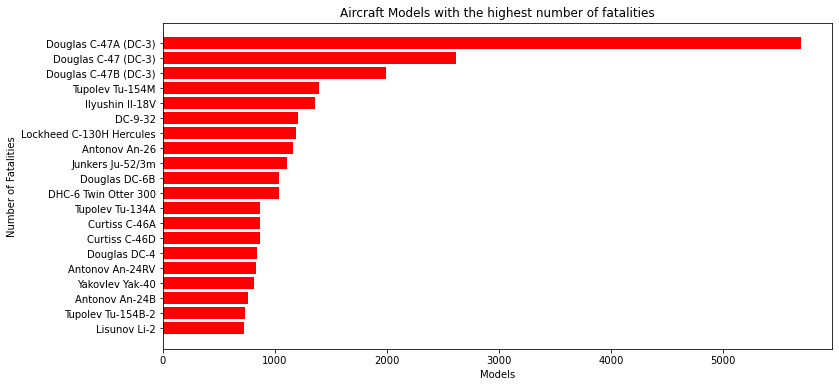

In [33]:
# Bar graph for top 20 aircraft models by fatalities count
top_20_fatalities = top_models_fatalities.tail(20)
plt.figure(figsize=(12,6)) # Setting the figure size
plt.barh(top_20_fatalities.index, top_20_fatalities.values, color="red")
plt.title("Aircraft Models with the highest number of fatalities", color="black")  
plt.xlabel("Models", color="black")
plt.ylabel("Number of Fatalities", color="black")   

### **Operator Risk**

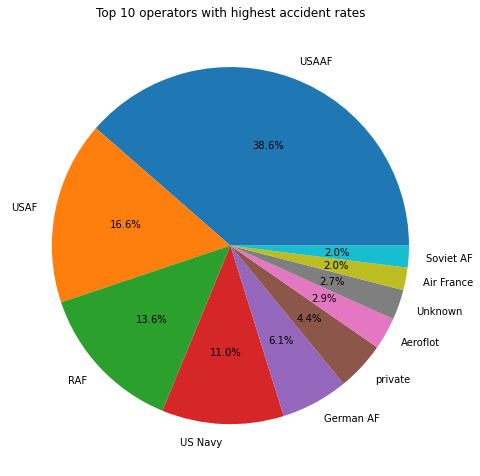

In [34]:
# Identifying the operators with the highest number of accidents
top_operators = df_clean['Operator'].value_counts().head(10)    

plt.figure(figsize=(8,10))
plt.pie(top_operators.values, labels=top_operators.index, autopct='%1.1f%%', textprops={'color':"black"}) 
plt.title("Top 10 operators with highest accident rates", color="black")
plt.show()



The top 10 operators due to most accidents make up 95% of all the accident cases. As for the first 5, they are mainly Military operators which makes sense due to the wars that have been involved due the 100-year period. Since the company wants to invest in this industry, it is worth noting that 'private' operators make up 4.4% of all accidents so far. This is quite low but should be put into consideration given that all the others above are military operators. This means private operators are very susceptible to accidents hence due diligence should be done to identify the root cause before investing in this industry 

### **Geographic Risk**

Text(0, 0.5, 'Number of Accidents')

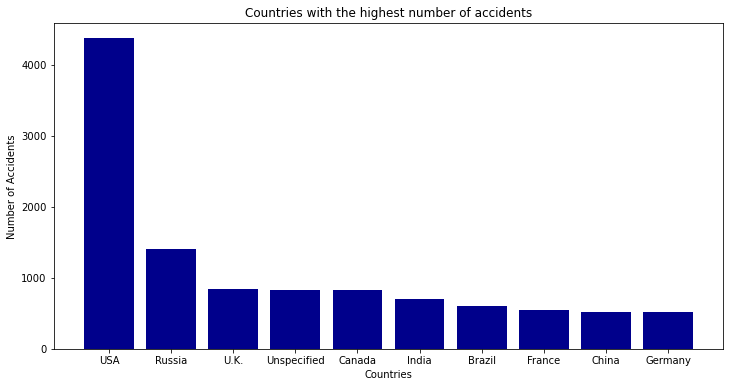

In [35]:
# Bar graph for countries with the least number of accidents
Country_counts = df_clean['Country'].value_counts().head(10)

# Plotting a bar graph
plt.figure(figsize=(12,6)) # Setting the figure size
plt.bar(Country_counts.index, Country_counts.values, color="darkblue")
plt.title("Countries with the highest number of accidents", color="black")  
plt.xlabel("Countries", color="black")
plt.ylabel("Number of Accidents", color="black")


USA has the highest number of recorded accidents. The company has two consider that investing in aircrafts that fly to the US imposes greater risks than any other location historically. As much as the US may be better profitably, the risks involved are also significantly high. There are also unspecified countries which need to be investigated deeper and identified for a well-informed investment decision 

Text(0, 0.5, 'Locations')

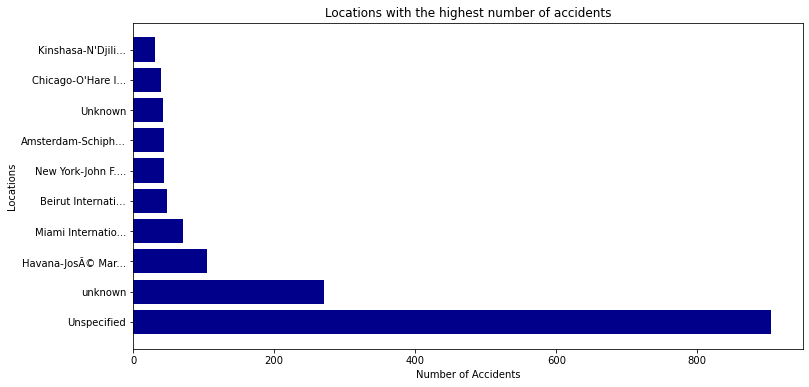

In [36]:
# Bar graph for location with the least number of accidents
Location_counts = df_clean['Location'].value_counts().head(10)

# Plotting a bar graph
plt.figure(figsize=(12,6)) # Setting the figure size
plt.barh(Location_counts.index, Location_counts.values, color="darkblue")
plt.title("Locations with the highest number of accidents", color="black")  
plt.xlabel("Number of Accidents", color="black")
plt.ylabel("Locations", color="black")

The locations do not provide complete information due to the unknown and unspecified locations. This means it would be difficult to identify the highest risk locations that should be taken into consideration when determining the risk of landing.